Jan Czechowicz, s5767512

# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

## Research Background ##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
# Load and check the dataset:
import pandas as pd

df = pd.read_csv('BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [2]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [4]:
# Let's check how many rows there are now
df.shape[0]

90

## Research Design ##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

*H0:* The low levels of masculinity in male characters does not affect fanfiction success when controlling for publication year and lexical richness.

##Compute Masculinity Score##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


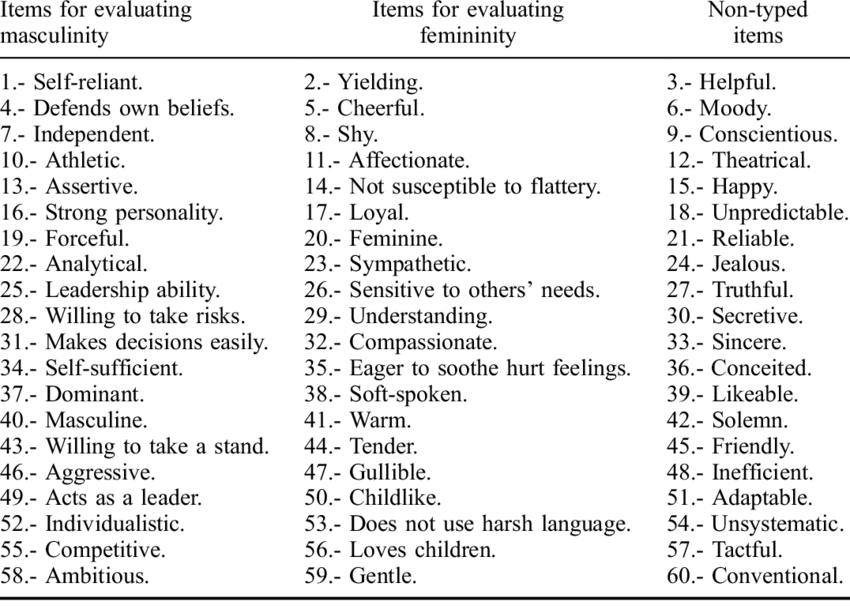

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###Riveter###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

In [ ]:
# Clone the GitHub repository:
! git clone https://github.com/maartensap/riveter-nlp.git

# Listing the files in the repository:
%ls

# Moving to the riveter-nlp file:
%cd riveter-nlp

# Moving to the riveter file
%cd riveter

In [ ]:
# Install dependencies:
!pip install -U spacy-experimental
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl  
!python -m spacy download en_core_web_sm

Now we have prepared all the dependencies needed.

### Import libraries 

In [9]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error
import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [10]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [11]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
riveter = Riveter()
riveter.load_sap_lexicon('power')
scores_dict = {}


Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [12]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]



    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    riveter.train(segments, text_ids, num_bootstraps = 20,
                  persona_patterns_dict={'masculine':r'^he$|^him$|^himself$'} )
   
    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score



Processing stories:   1%|▋                                                              | 1/90 [00:36<54:06, 36.48s/it]

2024-03-14 18:16:48 Complete!
Story ID: 4706144, Masculine Power Score: 0.08872459298210131



Processing stories:   2%|█▍                                                             | 2/90 [01:08<49:29, 33.74s/it]

2024-03-14 18:17:20 Complete!
Story ID: 4752980, Masculine Power Score: 0.2895579266365348



Processing stories:   3%|██                                                             | 3/90 [01:36<45:23, 31.31s/it]

2024-03-14 18:17:49 Complete!
Story ID: 4621698, Masculine Power Score: 0.5244444444444445



Processing stories:   4%|██▊                                                            | 4/90 [02:09<45:39, 31.86s/it]

2024-03-14 18:18:21 Complete!
Story ID: 3651108, Masculine Power Score: 0.12069485384319145



Processing stories:   6%|███▌                                                           | 5/90 [02:43<46:24, 32.76s/it]

2024-03-14 18:18:56 Complete!
Story ID: 5282729, Masculine Power Score: 0.20948368716110655



Processing stories:   7%|████▏                                                          | 6/90 [03:17<46:31, 33.24s/it]

2024-03-14 18:19:30 Complete!
Story ID: 5533886, Masculine Power Score: -0.014229497354497352



Processing stories:   8%|████▋                                                       | 7/90 [07:35<2:27:23, 106.55s/it]

2024-03-14 18:23:47 Complete!
Story ID: 4547622, Masculine Power Score: 0.058763332750480846



Processing stories:   9%|█████▍                                                       | 8/90 [08:06<1:52:35, 82.38s/it]

2024-03-14 18:24:18 Complete!
Story ID: 16177508, Masculine Power Score: 0.2609431602553045



Processing stories:  10%|██████                                                       | 9/90 [08:38<1:30:18, 66.90s/it]

2024-03-14 18:24:51 Complete!
Story ID: 15745185, Masculine Power Score: -0.11103090429721334



 33%|████████████████████████████                                                        | 1/3 [00:15<00:31, 15.92s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|██████▋                                                     | 10/90 [09:11<1:14:56, 56.21s/it]

2024-03-14 18:25:23 Complete!
Story ID: 15654528, Masculine Power Score: 0.24084387050488748



Processing stories:  12%|███████▎                                                    | 11/90 [09:41<1:03:24, 48.15s/it]

2024-03-14 18:25:53 Complete!
Story ID: 7448155, Masculine Power Score: 0.32617066821623775



Processing stories:  13%|████████▎                                                     | 12/90 [10:15<57:04, 43.90s/it]

2024-03-14 18:26:27 Complete!
Story ID: 4983847, Masculine Power Score: 0.10006564172756723



Processing stories:  14%|████████▉                                                     | 13/90 [10:49<52:29, 40.91s/it]

2024-03-14 18:27:01 Complete!
Story ID: 3313118, Masculine Power Score: -0.23736436570675706



Processing stories:  16%|█████████▋                                                    | 14/90 [11:22<48:50, 38.56s/it]

2024-03-14 18:27:34 Complete!
Story ID: 3290390, Masculine Power Score: -0.10713971281836285



Processing stories:  17%|██████████▎                                                   | 15/90 [11:58<47:25, 37.94s/it]

2024-03-14 18:28:11 Complete!
Story ID: 36435301, Masculine Power Score: 0.04180987710399475



Processing stories:  18%|███████████                                                   | 16/90 [12:31<44:51, 36.37s/it]

2024-03-14 18:28:43 Complete!
Story ID: 36575491, Masculine Power Score: 0.26438417596080344



Processing stories:  19%|███████████▋                                                  | 17/90 [13:03<42:45, 35.14s/it]

2024-03-14 18:29:16 Complete!
Story ID: 35225224, Masculine Power Score: 0.23907942583613936



Processing stories:  20%|████████████▍                                                 | 18/90 [13:34<40:33, 33.80s/it]

2024-03-14 18:29:46 Complete!
Story ID: 4594527, Masculine Power Score: 0.21664918414918413



Processing stories:  21%|█████████████                                                 | 19/90 [14:04<38:41, 32.69s/it]

2024-03-14 18:30:17 Complete!
Story ID: 5485625, Masculine Power Score: 0.10681697612732093



Processing stories:  22%|█████████████▊                                                | 20/90 [14:35<37:25, 32.08s/it]

2024-03-14 18:30:47 Complete!
Story ID: 36408319, Masculine Power Score: 0.14452690549904174



Processing stories:  23%|██████████████▍                                               | 21/90 [15:11<38:24, 33.40s/it]

2024-03-14 18:31:24 Complete!
Story ID: 35762659, Masculine Power Score: 0.20764338875659258



Processing stories:  24%|███████████████▏                                              | 22/90 [15:44<37:43, 33.29s/it]

2024-03-14 18:31:57 Complete!
Story ID: 35603194, Masculine Power Score: 0.36538578751779627



Processing stories:  26%|███████████████▊                                              | 23/90 [16:18<37:12, 33.32s/it]

2024-03-14 18:32:30 Complete!
Story ID: 35344306, Masculine Power Score: 0.13291308028156465



Processing stories:  27%|████████████████▌                                             | 24/90 [16:47<35:19, 32.11s/it]

2024-03-14 18:32:59 Complete!
Story ID: 36695155, Masculine Power Score: 0.18555555555555556



Processing stories:  28%|█████████████████▏                                            | 25/90 [17:20<35:08, 32.44s/it]

2024-03-14 18:33:33 Complete!
Story ID: 36064474, Masculine Power Score: 0.13284145909165582



Processing stories:  29%|█████████████████▉                                            | 26/90 [17:51<33:57, 31.84s/it]

2024-03-14 18:34:03 Complete!
Story ID: 36024820, Masculine Power Score: 0.15258881356726323



Processing stories:  30%|██████████████████▌                                           | 27/90 [18:27<34:43, 33.08s/it]

2024-03-14 18:34:39 Complete!
Story ID: 35182330, Masculine Power Score: 0.060010956451292195



Processing stories:  31%|███████████████████▎                                          | 28/90 [19:01<34:36, 33.49s/it]

2024-03-14 18:35:13 Complete!
Story ID: 36567496, Masculine Power Score: 0.21304792844069748



Processing stories:  32%|███████████████████▉                                          | 29/90 [19:35<34:18, 33.75s/it]

2024-03-14 18:35:48 Complete!
Story ID: 35560330, Masculine Power Score: 0.13812331247425158



Processing stories:  33%|████████████████████▋                                         | 30/90 [20:12<34:38, 34.65s/it]

2024-03-14 18:36:25 Complete!
Story ID: 35877496, Masculine Power Score: 0.14796221408960392



Processing stories:  34%|█████████████████████▎                                        | 31/90 [20:46<33:44, 34.31s/it]

2024-03-14 18:36:58 Complete!
Story ID: 35957410, Masculine Power Score: 0.292252305263067



Processing stories:  36%|██████████████████████                                        | 32/90 [21:18<32:38, 33.76s/it]

2024-03-14 18:37:31 Complete!
Story ID: 30947654, Masculine Power Score: 0.0022335796387520533



Processing stories:  37%|██████████████████████▋                                       | 33/90 [21:52<31:59, 33.68s/it]

2024-03-14 18:38:04 Complete!
Story ID: 36332707, Masculine Power Score: -0.10226769300827927



Processing stories:  38%|████████████████████▊                                  | 34/90 [1:34:15<20:38:16, 1326.72s/it]

2024-03-14 19:50:28 Complete!
Story ID: 35967940, Masculine Power Score: 0.18522399808729859



Processing stories:  39%|█████████████████████▊                                  | 35/90 [1:34:27<14:14:27, 932.13s/it]

2024-03-14 19:50:39 Complete!
Story ID: 35001073, Masculine Power Score: 0.1886219336219336



Processing stories:  40%|██████████████████████▊                                  | 36/90 [1:34:39<9:50:38, 656.26s/it]

2024-03-14 19:50:52 Complete!
Story ID: 35138911, Masculine Power Score: 0.15417331073090226



Processing stories:  41%|███████████████████████▍                                 | 37/90 [1:34:57<6:50:26, 464.65s/it]

2024-03-14 19:51:09 Complete!
Story ID: 35280397, Masculine Power Score: 0.2114958133971292



Processing stories:  42%|████████████████████████                                 | 38/90 [1:35:09<4:45:05, 328.95s/it]

2024-03-14 19:51:22 Complete!
Story ID: 36049939, Masculine Power Score: 0.2692800838119182



Processing stories:  43%|████████████████████████▋                                | 39/90 [1:35:22<3:19:02, 234.17s/it]

2024-03-14 19:51:35 Complete!
Story ID: 34995673, Masculine Power Score: 0.1441563254203217



Processing stories:  44%|█████████████████████████▎                               | 40/90 [1:35:36<2:19:54, 167.89s/it]

2024-03-14 19:51:48 Complete!
Story ID: 33477346, Masculine Power Score: 0.43255998903057724



Processing stories:  46%|█████████████████████████▉                               | 41/90 [1:36:03<1:42:38, 125.69s/it]

2024-03-14 19:52:15 Complete!
Story ID: 36840832, Masculine Power Score: -0.2240924426450742



Processing stories:  47%|███████████████████████████                               | 42/90 [1:36:30<1:17:01, 96.27s/it]

2024-03-14 19:52:43 Complete!
Story ID: 30896276, Masculine Power Score: 0.01821428571428572



Processing stories:  48%|████████████████████████████▋                               | 43/90 [1:36:57<59:04, 75.40s/it]

2024-03-14 19:53:10 Complete!
Story ID: 37363471, Masculine Power Score: 0.4174982911825017



Processing stories:  49%|█████████████████████████████▎                              | 44/90 [1:37:24<46:37, 60.82s/it]

2024-03-14 19:53:36 Complete!
Story ID: 36984901, Masculine Power Score: 0.12103868574456811



Processing stories:  50%|██████████████████████████████                              | 45/90 [1:37:53<38:20, 51.13s/it]

2024-03-14 19:54:05 Complete!
Story ID: 33353644, Masculine Power Score: 0.014209303460135875



Processing stories:  51%|██████████████████████████████▋                             | 46/90 [1:38:21<32:32, 44.38s/it]

2024-03-14 19:54:33 Complete!
Story ID: 37002835, Masculine Power Score: -0.13418498168498166



Processing stories:  52%|███████████████████████████████▎                            | 47/90 [1:38:49<28:19, 39.53s/it]

2024-03-14 19:55:02 Complete!
Story ID: 5630824, Masculine Power Score: 0.30932594644506



Processing stories:  53%|████████████████████████████████                            | 48/90 [1:39:17<25:14, 36.06s/it]

2024-03-14 19:55:30 Complete!
Story ID: 10053617, Masculine Power Score: 0.23071772209384384



Processing stories:  54%|████████████████████████████████▋                           | 49/90 [1:39:47<23:16, 34.05s/it]

2024-03-14 19:55:59 Complete!
Story ID: 1572659, Masculine Power Score: 0.2620044906074318



Processing stories:  56%|█████████████████████████████████▎                          | 50/90 [1:40:17<22:01, 33.04s/it]

2024-03-14 19:56:30 Complete!
Story ID: 7450573, Masculine Power Score: 0.35100364032252573



Processing stories:  57%|██████████████████████████████████                          | 51/90 [1:40:48<20:54, 32.17s/it]

2024-03-14 19:57:00 Complete!
Story ID: 6918676, Masculine Power Score: 0.08841637748843477



Processing stories:  58%|██████████████████████████████████▋                         | 52/90 [1:41:24<21:07, 33.36s/it]

2024-03-14 19:57:36 Complete!
Story ID: 6075402, Masculine Power Score: 0.36315913568993247



Processing stories:  59%|███████████████████████████████████▎                        | 53/90 [1:41:55<20:10, 32.73s/it]

2024-03-14 19:58:07 Complete!
Story ID: 11101779, Masculine Power Score: 0.35343915343915344



Processing stories:  60%|████████████████████████████████████                        | 54/90 [1:42:28<19:39, 32.76s/it]

2024-03-14 19:58:40 Complete!
Story ID: 11321331, Masculine Power Score: 0.10366094022251149



Processing stories:  61%|████████████████████████████████████▋                       | 55/90 [1:42:57<18:27, 31.63s/it]

2024-03-14 19:59:09 Complete!
Story ID: 12284853, Masculine Power Score: 0.07800692979963406



Processing stories:  62%|█████████████████████████████████████▎                      | 56/90 [1:43:26<17:32, 30.96s/it]

2024-03-14 19:59:38 Complete!
Story ID: 12282003, Masculine Power Score: 0.09509350656106537



Processing stories:  63%|██████████████████████████████████████                      | 57/90 [1:43:54<16:29, 30.00s/it]

2024-03-14 20:00:06 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████████████████████████████████████▋                     | 58/90 [1:44:22<15:44, 29.50s/it]

2024-03-14 20:00:35 Complete!
Story ID: 4228053, Masculine Power Score: 0.21420954737497686



Processing stories:  66%|███████████████████████████████████████▎                    | 59/90 [1:44:53<15:24, 29.84s/it]

2024-03-14 20:01:05 Complete!
Story ID: 12127317, Masculine Power Score: 0.10231771899392036



Processing stories:  67%|████████████████████████████████████████                    | 60/90 [1:45:21<14:39, 29.33s/it]

2024-03-14 20:01:33 Complete!
Story ID: 12010134, Masculine Power Score: 0.2925997276380907



Processing stories:  68%|████████████████████████████████████████▋                   | 61/90 [1:45:52<14:24, 29.80s/it]

2024-03-14 20:02:04 Complete!
Story ID: 11510919, Masculine Power Score: 0.44713694624560507



Processing stories:  69%|█████████████████████████████████████████▎                  | 62/90 [1:46:23<14:06, 30.24s/it]

2024-03-14 20:02:36 Complete!
Story ID: 8145802, Masculine Power Score: 0.20188679172294677



Processing stories:  70%|██████████████████████████████████████████                  | 63/90 [1:46:54<13:37, 30.28s/it]

2024-03-14 20:03:06 Complete!
Story ID: 6637942, Masculine Power Score: -0.13565156196918124



Processing stories:  71%|██████████████████████████████████████████▋                 | 64/90 [1:47:23<12:57, 29.90s/it]

2024-03-14 20:03:35 Complete!
Story ID: 7427905, Masculine Power Score: -0.029729251310133663



Processing stories:  72%|███████████████████████████████████████████▎                | 65/90 [1:47:51<12:19, 29.58s/it]

2024-03-14 20:04:04 Complete!
Story ID: 3893857, Masculine Power Score: 0.12873820435142744



Processing stories:  73%|████████████████████████████████████████████                | 66/90 [1:48:20<11:45, 29.41s/it]

2024-03-14 20:04:33 Complete!
Story ID: 33040258, Masculine Power Score: 0.18047619047619046



Processing stories:  74%|████████████████████████████████████████████▋               | 67/90 [1:48:51<11:27, 29.89s/it]

2024-03-14 20:05:04 Complete!
Story ID: 33858850, Masculine Power Score: -0.19475992961287078



Processing stories:  76%|█████████████████████████████████████████████▎              | 68/90 [1:49:23<11:11, 30.50s/it]

2024-03-14 20:05:36 Complete!
Story ID: 2775776, Masculine Power Score: 0.22134920634920635



Processing stories:  77%|██████████████████████████████████████████████              | 69/90 [1:49:54<10:42, 30.62s/it]

2024-03-14 20:06:07 Complete!
Story ID: 3197963, Masculine Power Score: 0.2941239316239316



Processing stories:  78%|██████████████████████████████████████████████▋             | 70/90 [1:50:23<09:59, 29.98s/it]

2024-03-14 20:06:35 Complete!
Story ID: 12395199, Masculine Power Score: 0.14863378349478132



Processing stories:  79%|███████████████████████████████████████████████▎            | 71/90 [1:50:51<09:19, 29.42s/it]

2024-03-14 20:07:03 Complete!
Story ID: 10934010, Masculine Power Score: 0.2751510989010989



Processing stories:  80%|████████████████████████████████████████████████            | 72/90 [1:51:19<08:43, 29.06s/it]

2024-03-14 20:07:31 Complete!
Story ID: 12301116, Masculine Power Score: -0.035908449284129854



Processing stories:  81%|████████████████████████████████████████████████▋           | 73/90 [1:51:49<08:19, 29.36s/it]

2024-03-14 20:08:01 Complete!
Story ID: 12706317, Masculine Power Score: -0.11181941699604743



Processing stories:  82%|█████████████████████████████████████████████████▎          | 74/90 [1:52:21<08:01, 30.10s/it]

2024-03-14 20:08:33 Complete!
Story ID: 11499468, Masculine Power Score: 0.03927682918514604



Processing stories:  83%|██████████████████████████████████████████████████          | 75/90 [1:52:50<07:24, 29.65s/it]

2024-03-14 20:09:02 Complete!
Story ID: 12184146, Masculine Power Score: 0.34877441587840563



Processing stories:  84%|██████████████████████████████████████████████████▋         | 76/90 [1:53:18<06:51, 29.42s/it]

2024-03-14 20:09:31 Complete!
Story ID: 12201333, Masculine Power Score: 0.10906196271612094



Processing stories:  86%|███████████████████████████████████████████████████▎        | 77/90 [1:53:50<06:32, 30.22s/it]

2024-03-14 20:10:03 Complete!
Story ID: 11496030, Masculine Power Score: 0.018552316639443393



Processing stories:  87%|████████████████████████████████████████████████████        | 78/90 [1:54:22<06:07, 30.61s/it]

2024-03-14 20:10:34 Complete!
Story ID: 11510277, Masculine Power Score: 0.2233485625083423



Processing stories:  88%|████████████████████████████████████████████████████▋       | 79/90 [1:54:55<05:44, 31.29s/it]

2024-03-14 20:11:07 Complete!
Story ID: 10772274, Masculine Power Score: 0.49918270477254145



Processing stories:  89%|█████████████████████████████████████████████████████▎      | 80/90 [1:55:25<05:08, 30.85s/it]

2024-03-14 20:11:37 Complete!
Story ID: 12646050, Masculine Power Score: 0.04904396157858762



Processing stories:  90%|██████████████████████████████████████████████████████      | 81/90 [1:55:54<04:33, 30.38s/it]

2024-03-14 20:12:06 Complete!
Story ID: 11161479, Masculine Power Score: -0.037769722571982196



Processing stories:  91%|██████████████████████████████████████████████████████▋     | 82/90 [1:56:24<04:02, 30.27s/it]

2024-03-14 20:12:36 Complete!
Story ID: 12069936, Masculine Power Score: 0.026986530031642805



Processing stories:  92%|███████████████████████████████████████████████████████▎    | 83/90 [1:56:54<03:31, 30.24s/it]

2024-03-14 20:13:07 Complete!
Story ID: 12285972, Masculine Power Score: 0.452372713258408



Processing stories:  93%|████████████████████████████████████████████████████████    | 84/90 [1:57:23<02:58, 29.68s/it]

2024-03-14 20:13:35 Complete!
Story ID: 12372702, Masculine Power Score: 0.014183409666798994



Processing stories:  94%|████████████████████████████████████████████████████████▋   | 85/90 [1:57:53<02:30, 30.04s/it]

2024-03-14 20:14:06 Complete!
Story ID: 12610496, Masculine Power Score: 0.10302668016649286



Processing stories:  96%|█████████████████████████████████████████████████████████▎  | 86/90 [1:58:25<02:02, 30.55s/it]

2024-03-14 20:14:38 Complete!
Story ID: 10970472, Masculine Power Score: 0.1268157768157768



Processing stories:  97%|██████████████████████████████████████████████████████████  | 87/90 [1:58:54<01:29, 29.93s/it]

2024-03-14 20:15:06 Complete!
Story ID: 12084552, Masculine Power Score: 0.3055358525233871



Processing stories:  98%|██████████████████████████████████████████████████████████▋ | 88/90 [1:59:29<01:03, 31.59s/it]

2024-03-14 20:15:41 Complete!
Story ID: 12727119, Masculine Power Score: -0.004698196432183698



Processing stories:  99%|███████████████████████████████████████████████████████████▎| 89/90 [1:59:58<00:30, 30.88s/it]

2024-03-14 20:16:11 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|████████████████████████████████████████████████████████████| 90/90 [2:00:28<00:00, 80.32s/it]

2024-03-14 20:16:41 Complete!
Story ID: 10859508, Masculine Power Score: 0.24331139673008387


In [ ]:
# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)  
persona_score_dict = riveter.get_score_totals()

**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [14]:
# Q2 (code)
df.sample(5)

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score
78,3197963,2015,1127,944.0,16.0,early morning\n\nJimin thought it was a mistak...,0.294124
22,36435301,2022,1193,31.0,10.0,we all make art\n\nAuthor's Note:\n\ni surpris...,0.041810
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.209484
82,12706317,2017,1088,158.0,7.0,Finding Home\n\nThe soft hum of faint discussi...,-0.111819
11,16177508,2018,1043,29.0,NaN,"Remember\n\nUnconditional and eternal, such ar...",0.260943


In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False)

##Compute Lexical Richness Score##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [18]:
!pip install lexicalrichness

     ---------------------------------------- 0.0/97.8 kB ? eta -:--:--
     ---------------------------------------- 97.8/97.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for textblob>=0.15.3 from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------------------------------------- - 604.2/626.3 kB 19.2 MB/s eta 0:00:01
   --------------------------------------- 626.3/626.3 kB 13.4 MB/s eta 0:00:00
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15491 sha256=bebc2c44630d1dbdae6320a326aee525ba38c797b005fb09d19c41821183eb35
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\bb\68\f4\1a32ae0aae29ce426b4e3c106a4e8e9c19fd13bcaff45c6a8e
Suc

In [15]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.088725,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.289558,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.524444,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.120695,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.209484,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##Regressions##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


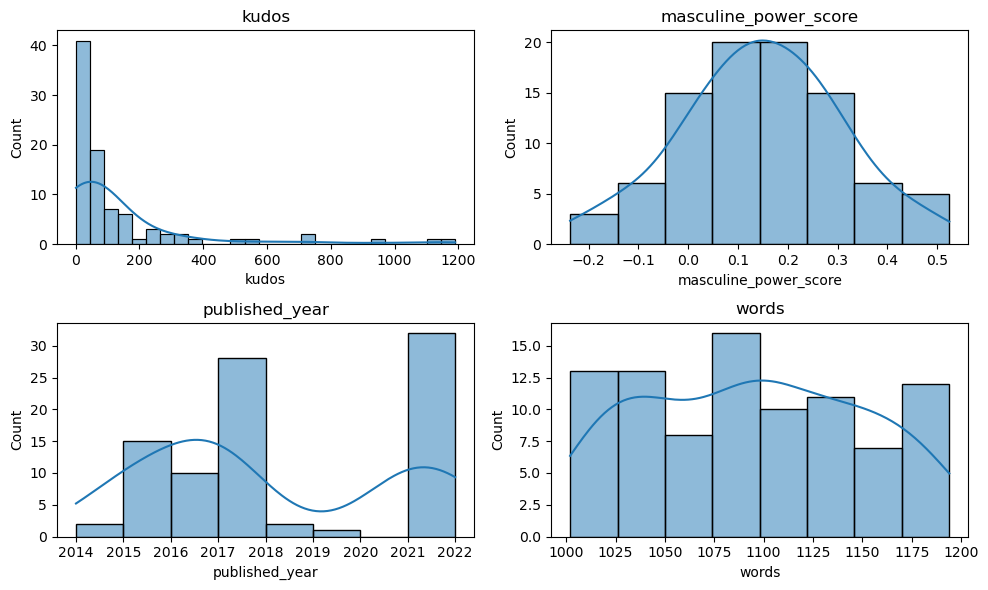

In [16]:
# Q3a (code): Check data distribution
columns = ['kudos','masculine_power_score', 'published_year','words']
df_numeric = df[columns]

# Visualize the distributions of these numeric values
plt.figure(figsize = (10, 6))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde = True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [17]:
# Q3b (code): compute some descriptive statistics
df_numeric.describe()

,kudos,masculine_power_score,published_year,words
count,89.000000,90.000000,90.000000,90.000000
mean,135.393258,0.147114,2018.088889,1094.344444
std,229.972311,0.161949,2.612177,55.327048
min,1.000000,-0.237364,2014.000000,1002.000000
25%,20.000000,0.039910,2016.000000,1042.250000
50%,54.000000,0.144342,2017.000000,1095.000000
75%,122.000000,0.256535,2021.000000,1141.750000
max,1190.000000,0.524444,2022.000000,1194.000000


In [18]:
# Q3c (code): Check for any missing values
df.isnull().sum()

story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
masculine_power_score     0
lexical_richness          0
dtype: int64

In [19]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
df = df.fillna(0, inplace=True)
# Check Q3c:
df.isnull().sum()

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

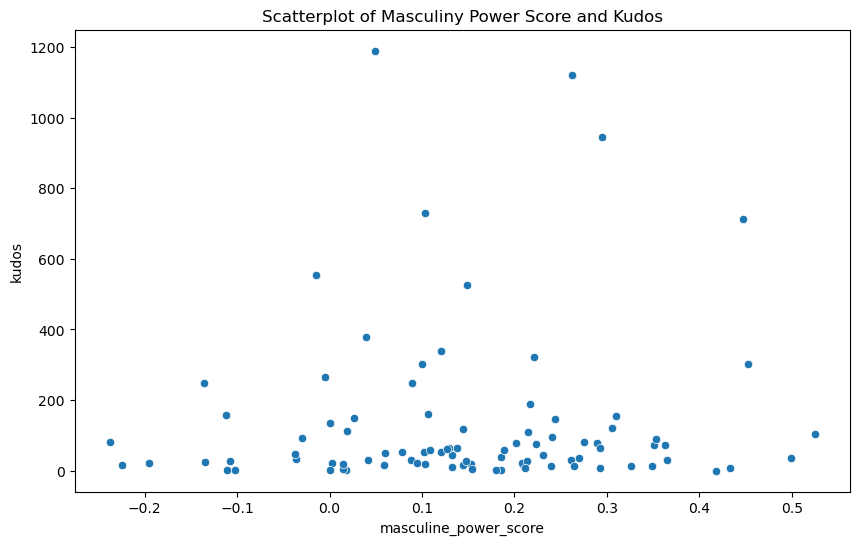

In [20]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
plt.figure(figsize=(10, 6))
plt.scatter(df['masculine_power_score'], df['kudos'])
plt.xlabel("Masculine Power Score")
plt.ylabel("Amount of Kudos")
plt.title('Scatterplot of Masculiny Power Score and Kudos')
plt.show()

**Q5. Multiple Regression and Analysis**

In [21]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Select predictors and the target value:
X = df[['masculine_power_score', 'published_year', 'words']]
y = df['kudos']

# Fitting the multiple linear regression model:
model = LinearRegression()
model.fit(X, y)

# For statsmodels, adding a constant to include an intercept in the model:
X_sm = sm.add_constant(X)

# Create OLS regression model and fit to data:
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.599
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00148
Time:                        08:40:50   Log-Likelihood:                -608.26
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.003e+

**Q6. Interpret the results of the regression analysis**

*Q6a*
- R-squared:
R-squared is a statistical measure that represents the proportion of the variance for our dependent variable, in this case ‘kudos’, that’s predicted from the independent variables. A value of R-squared near 1 signifies that a large percentage of the variance in the dependent variable is accounted for by the independent variables. Conversely, a value near 0 suggests that the independent variables do not significantly explain the variance. In our specific scenario, only 16.3% of the variance can be explained, indicating that a substantial portion remains unexplained by the model, possibly due to other factors.

- Adj. R-squared:
This refers to an adjusted version of the R-squared value that takes into account the number of predictors in our model, which in this instance is 3. This adjustment aids in identifying any superfluous predictors in the model, thereby providing a more precise R-squared value. Given that it’s lower at 0.134 (which is typically the case when there are multiple predictors), it suggests that some predictors do not significantly aid in explaining the variance in the ‘kudos’ variable.

*Q6b*
- The F-test:
The F-test is a statistical measure that quantifies the ratio of explained variance to unexplained variance in the dependent variable. In this instance, an F-value of 5.599 and a p-value (probability of F-statistics) of 0.00148 indicate that the comprehensive model with all independent variables is statistically significant, as it is less than the standard significance level of 0.05. Consequently, we can dismiss the null hypothesis and conclude that at least one of the independent variables has a significant correlation with the dependent variable in the model.

*Q6c*
- Coefficients and t-test:
The constant term, which signifies the anticipated value of the dependent variable ‘kudos’ when all independent variables are zero, stands at 7.003e+04. The coefficient for ‘masculine_power_score’ is 54.9363 with a p-value of 0.695, which exceeds the selected significance level of 0.05, implying that it is not statistically significant and does not substantially influence the ‘kudos’ variable. Conversely, the coefficient for ‘published_year’ is -34.4720 with a p-value less than 0.05, indicating that it is statistically significant and impacts the dependent variable. Lastly, ‘words’ is also not statistically significant at the chosen level and does not have a significant effect on the ‘kudos’ variable in this model.

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [ ]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
from scipy import stats

# Predict the target dependent variable:
y_predictions = model.predict(X)

# Find the difference between predicted and actual variable:
residuals = y - y_predictions

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test p-value:", shapiro_test[1])

*Q7b*
- The Normality Test analysis:
The p-value derived from the Shapiro test is nearly zero and falls below the significance level of 0.05. As a result, we dismiss the null hypothesis and propose that the residuals do not follow a normal distribution. This suggests a violation of the normality assumption of residuals, which could potentially affect the validity of the statistical inferences drawn from the regression model.

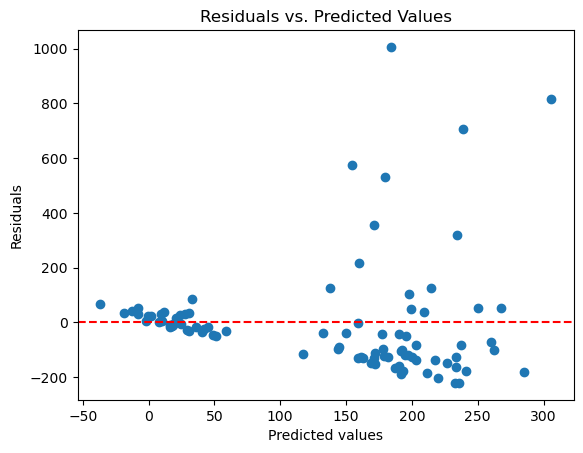

In [25]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)
plt.scatter(y_predictions, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

*Q7d* 
- Homoscedasticity Test analysis:
As observed, the predicted values up to a certain point (50) are randomly dispersed around the horizontal line at y = 0. This implies that the residuals up to that point maintain a constant variance across different predicted values, indicating homoscedasticity. However, beyond that point, the dispersion of points widens with changing predicted values, suggesting a potential violation of the constant variance of residuals. This is further corroborated by the outliers observed as the predicted values increase.

**Q8: Multicollinearity**

In [26]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_sm.values, i) for i in range(len(X_sm.columns))]

print(vif_data)


                 feature            VIF
0                  const  606513.126997
1  masculine_power_score       1.004312
2         published_year       1.003999
3                  words       1.000314


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

*Q8b*
- Multicollinearity test analysis:
Our Variance Inflation Factor (VIF) results for the independent variable (‘masculinity_power_score’, ‘published_year’, and ‘words’) are all approximately 1. This suggests that there is no significant multicollinearity among these variables. Consequently, we can have confidence in the estimates of the regression coefficients and their significance. However, the presence of a large condition number may hint at some numerical issues that are not detectable from the VIF results.

**Q9: Reflection**

*Q9*
- Reflection:
In relation to Hypothesis 1, the coefficient of ‘masculine_power_score’ is positive, but it’s not statistically significant, meaning we don’t have sufficient evidence to support H1. However, our research also doesn’t reject the null hypothesis, as we fail to find evidence to support either hypothesis. Interestingly, we found that ‘publication_year’ does have a statistically significant positive coefficient, implying that more recent stories receive more kudos. Additionally, a higher ‘lexical_richness’ seems to slightly increase kudos, but this is not statistically significant. Regarding the research framework, the R-squared and adjusted R-squared values indicate that less than 20% of the variance can be explained by the independent variables. This suggests that there are likely many more variables that influence kudos. The homoscedasticity and normality tests show that the residuals are not normally distributed and that there is heteroscedasticity, meaning that the reliability of the model is affected. There is also a low level of multicollinearity.In terms of improvements, the number of independent variables could be increased, and new hypotheses should be formed to identify these variables. Furthermore, in future analyses, steps should be taken to address the non-normal distribution, low level of multicollinearity, and heteroscedasticity.


##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.